<a href="https://colab.research.google.com/github/ITU-Business-Analytics-Team/Business_Analytics_for_Professionals/blob/main/Part%20I%20%3A%20Methods%20%26%20Technologies%20for%20Business%20Analytics/Chapter%209%3A%20Prescriptive%20Analytics%3A%20Optimization%20and%20Modelling/9_4_Warehouse_Location_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prescriptive Analytics: Optimization and Modeling**
## Warehouse Location Problem

A cargo company that distributes on the Asian side of Istanbul can open a types of warehouses in Asia regions.  A warehouse costs $30,000 and the cargo company can open at most one warehouse in a district.
While the warehouse can serve a total of all district adjacent to the district. If a district does not have a neighborhood with the district where the warehouse is opened, that district cannot receive service from that warehouse. The aim of the cargo company is to provide service to all districts. For this aim, the cargo company wants to open warehouses with the least cost.




In [1]:
#pip install pyomo
!pip install -q pyomo

     |████████████████████████████████| 9.6 MB 13.4 MB/s 
     |████████████████████████████████| 49 kB 6.6 MB/s 


In [2]:
import numpy as np
import pandas as pd
import math
import pyomo.environ as pyo
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.image as img

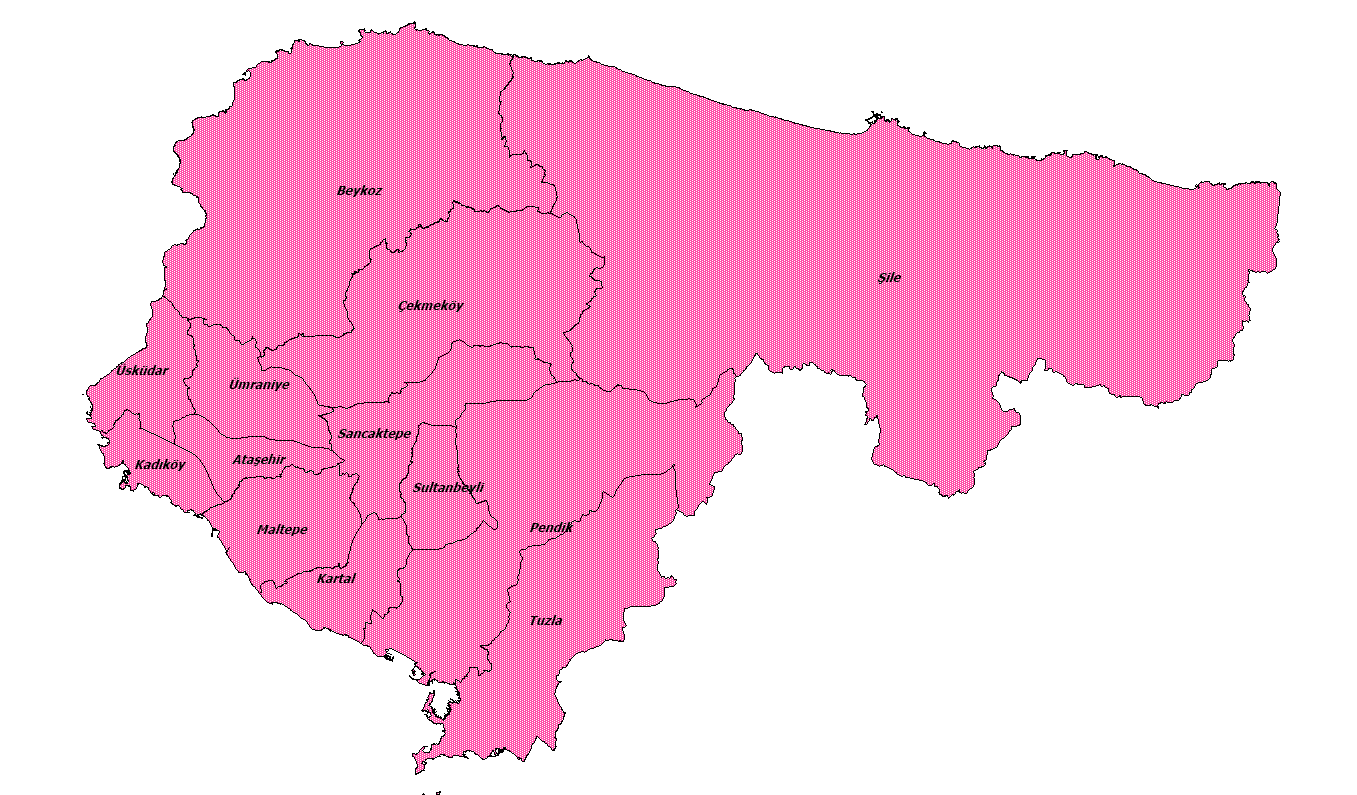

In [4]:
n= {(1,1):1, (1, 2):0, (1, 3): 0, (1, 4): 1,(1, 5): 0, (1, 6): 1, (1, 7): 0, (1, 8): 1, (1, 9):0, (1, 10): 0, (1, 11): 0, (1, 12): 1, (1, 13): 1, 
    (2,1):0, (2,2):1, (2, 3):1, (2, 4): 0, (2, 5): 0, (2, 6): 0, (2, 7): 0, (2, 8):0, (2, 9):1, (2, 10): 0, (2, 11): 0, (2, 12): 1,(2, 13): 1, 
    (3,1):0, (3,2):1, (3,3):1, (3, 4): 0,  (3, 5): 0, (3, 6): 0, (3, 7): 1, (3, 8):1,(3, 9):1, (3, 10): 0, (3, 11): 0, (3, 12): 1,(3, 13): 0,
    (4,1):1, (4,2):0, (4, 3): 0, (4,4):1, (4, 5): 0, (4, 6): 1, (4, 7): 0, (4, 8):1, (4, 9):0, (4, 10): 0, (4, 11): 0, (4, 12):0, (4, 13): 1, 
    (5,1):0, (5,2):0, (5, 3): 0, (5, 4): 0, (5,5):1,  (5, 6): 1, (5, 7): 1, (5, 8):1, (5, 9): 0, (5, 10): 1, (5, 11): 0, (5, 12): 0, (5, 13): 0, 
    (6,1):1, (6,2):0,  (6, 3): 0,  (6, 4): 1,  (6, 5): 1,  (6,6):1, (6, 7): 0, (6, 8):0, (6, 9):0,  (6, 10): 0, (6, 11): 0, (6, 12): 0, (6, 13): 0,
    (7,1):0, (7,2):0, (7, 3): 1, (7, 4): 0,  (7, 5):1,  (7, 6): 0, (7,7):1, (7, 8):1, (7, 9):1,  (7, 10): 1, (7, 11):1, (7, 12): 0,  (7, 13): 0,
    (8,1):1, (8,2):0,  (8, 3): 1, (8, 4): 0, (8, 5): 1, (8, 6): 1,  (8, 7):1, (8,8):1, (8, 9):0,  (8, 10): 1, (8, 11): 0, (8, 12): 1, (8, 13): 0, 
    
    (9,1):0, (9,2):1,  (9, 3): 1, (9, 4): 0, (9, 5): 0, (9, 6):0, (9, 7):1, (9, 8):0, (9,9):1, (9, 10): 0, (9, 11): 0, (9, 12): 0, (9, 13): 0, 
    
    (10,1):0, (10,2):0,  (10, 3): 0, (10, 4): 0, (10, 5): 1,(10, 6): 0, (10, 7):1,(10, 8):1,(10, 9): 0 ,(10,10):1, (10, 11): 0, (10, 12): 0,(10, 13):0, 
    (11,1):0, (11,2):0, (11, 3): 0, (11, 4): 0, (11, 5): 0,  (11, 6): 0, (11, 7):1, (11, 8):0, (11, 9): 0, (11, 10): 1,(11,11):1, (11, 12): 0, (11, 13): 0, 
    (12,1):1, (12,2):1, (12, 3): 1,  (12, 4): 0, (12, 5): 0, (12, 6):0, (12, 7):0,(12, 8):1, (12, 9): 0,(12,10):0, (12, 11): 0, (12, 12): 1, (12, 13): 1, 
    (13,1):1, (13,2):1, (13, 3): 0, (13, 4): 1, (13, 5): 0, (13, 6): 0, (13, 7):0,(13, 8):0, (13, 9): 0, (13, 10): 0, (13, 11): 0, (13, 12): 1, (13, 13):1} 
    

# Parameters

At the beginning of the problem, the cost of 30000 dollars, which we knew before, was defined as a parameter.



$c_i:$ Cost of warehouse to be opened in i district.

In [5]:
c=[30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000]


In [6]:
model = pyo.ConcreteModel()

# Decision Variable

$x_i:$ The status of whether receives service from the warehouse opened in district i.

In [7]:
I = range(1,14)
J=  range(1,14)
model.x = pyo.Var(I, domain = pyo.Binary) 
model.y = pyo.Var(domain = pyo.Binary) 

# Objective Function

$x_i:$  The status of whether receives service from the warehouse opened in district i.

In [8]:
model.obj_val = pyo.Objective(expr = (sum (model.x[i] * c[i-1] for i in I )),sense = pyo.minimize)

# Subject to

Within the constraints, it was ensured that each location received service from at least 1 place.

In [9]:
model.set = pyo.ConstraintList()
for j in J:
    model.set.add(sum(model.x[i]*n[(i,j)] for i  in I) >=1);
model.set.pprint()

set : Size=13, Index=set_index, Active=True
    Key : Lower : Body                                                    : Upper : Active
      1 :   1.0 :               x[1] + x[4] + x[6] + x[8] + x[12] + x[13] :  +Inf :   True
      2 :   1.0 :                      x[2] + x[3] + x[9] + x[12] + x[13] :  +Inf :   True
      3 :   1.0 :                x[2] + x[3] + x[7] + x[8] + x[9] + x[12] :  +Inf :   True
      4 :   1.0 :                              x[1] + x[4] + x[6] + x[13] :  +Inf :   True
      5 :   1.0 :                       x[5] + x[6] + x[7] + x[8] + x[10] :  +Inf :   True
      6 :   1.0 :                        x[1] + x[4] + x[5] + x[6] + x[8] :  +Inf :   True
      7 :   1.0 :        x[3] + x[5] + x[7] + x[8] + x[9] + x[10] + x[11] :  +Inf :   True
      8 :   1.0 : x[1] + x[3] + x[4] + x[5] + x[7] + x[8] + x[10] + x[12] :  +Inf :   True
      9 :   1.0 :                               x[2] + x[3] + x[7] + x[9] :  +Inf :   True
     10 :   1.0 :                      x[5] + 

Since the problem is linear, the "glpk" solver is used.

In [10]:
!apt-get install -y -qq glpk-utils

Selecting previously unselected package libsuitesparseconfig5:amd64.
(Reading database ... 155203 files and directories currently installed.)
Preparing to unpack .../libsuitesparseconfig5_1%3a5.1.2-2_amd64.deb ...
Unpacking libsuitesparseconfig5:amd64 (1:5.1.2-2) ...
Selecting previously unselected package libamd2:amd64.
Preparing to unpack .../libamd2_1%3a5.1.2-2_amd64.deb ...
Unpacking libamd2:amd64 (1:5.1.2-2) ...
Selecting previously unselected package libcolamd2:amd64.
Preparing to unpack .../libcolamd2_1%3a5.1.2-2_amd64.deb ...
Unpacking libcolamd2:amd64 (1:5.1.2-2) ...
Selecting previously unselected package libglpk40:amd64.
Preparing to unpack .../libglpk40_4.65-1_amd64.deb ...
Unpacking libglpk40:amd64 (4.65-1) ...
Selecting previously unselected package glpk-utils.
Preparing to unpack .../glpk-utils_4.65-1_amd64.deb ...
Unpacking glpk-utils (4.65-1) ...
Setting up libsuitesparseconfig5:amd64 (1:5.1.2-2) ...
Setting up libcolamd2:amd64 (1:5.1.2-2) ...
Setting up libamd2:amd64 

In [11]:
opt = pyo.SolverFactory("glpk")
opt.solve(model); 
for i in I:
    if pyo.value(model.x[i]) > 0:
        print(pyo.value(model.x[i]), model.x[i])
print("Location:", pyo.value(model.obj_val))

1.0 x[7]
1.0 x[8]
1.0 x[13]
Location: 90000.0


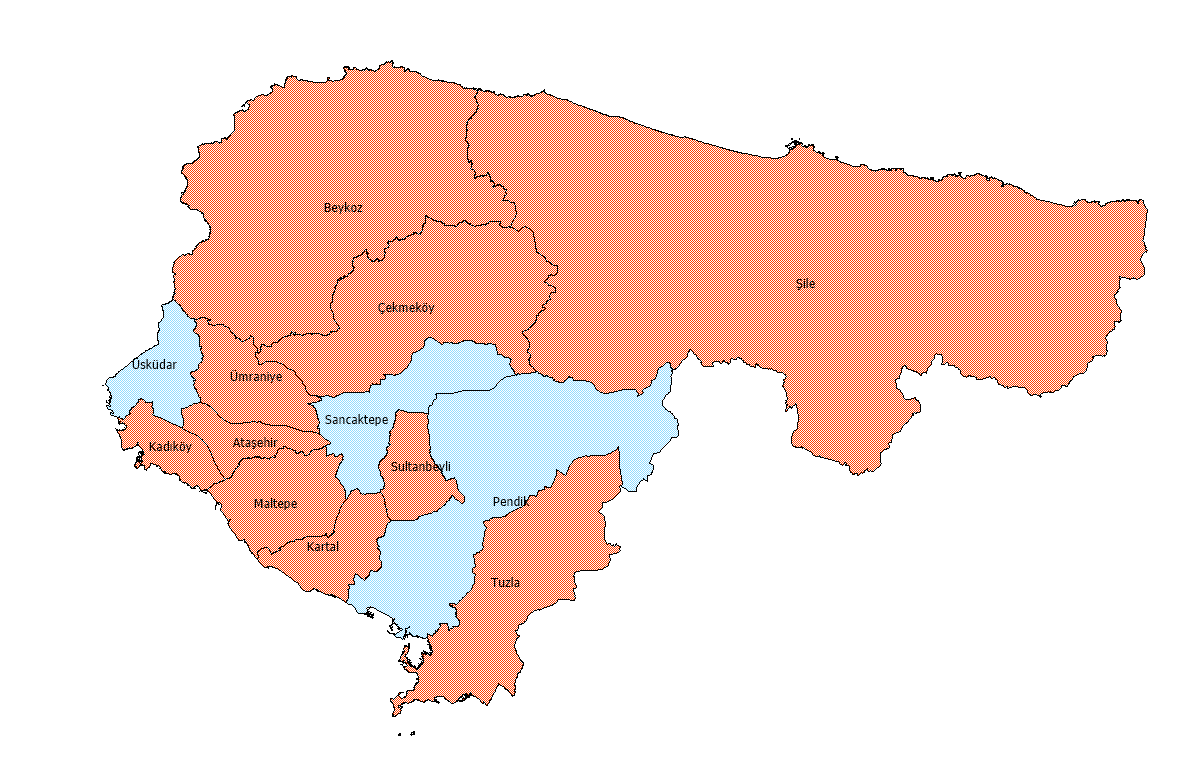

The optimal result is indicated as blue colored dots on the map above.

Accordingly, Pendik, Sancaktepe and Üsküdar are the locations where the warehouses will be opened.

In [13]:
import numpy as np
import pandas as pd
import math
import pyomo.environ as pyo
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.image as img

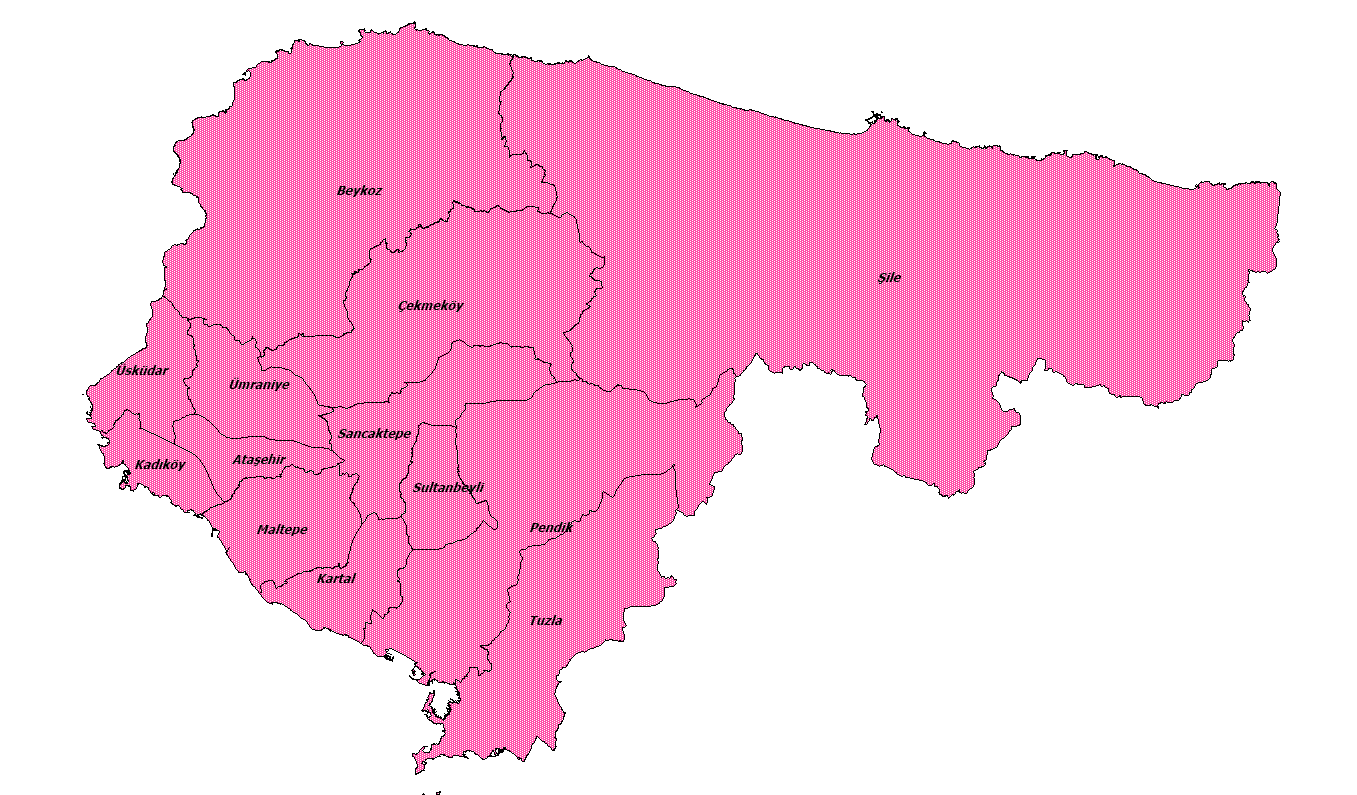

# Revised Warehouse Location Problem

A cargo company that distributes on the Asian side of Istanbul can open two types of warehouses in Asia regions.  A small size warehouse costs 30,000 Dolars, a large size warehouse costs 45,000 Dolars and the cargo company can open at most one warehouse in a district. While the small-size warehouse can serve a total of 2 district adjacent to the district, outside the district where it was opened, this number is 4 for the large-size warehouse. If a district does not have a neighborhood with the district where the warehouse is opened, that district cannot receive service from that warehouse. The aim of the cargo company is to provide service to all districts from at least one point.
For this aim, the cargo company wants to determine the types of warehouses and places to be opened with the least cost.


In [15]:
import numpy as np
import pandas as pd
import math
import pyomo.environ as pyo
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.image as img


In [16]:
model = pyo.ConcreteModel()

In [17]:
I = range(1,14)
J=  range(1,14)
K= range(1,3)
model.x = pyo.Var(I,J, domain = pyo.Binary) 
model.y = pyo.Var(I,K, domain = pyo.Binary) 

# parameters

For the modified version of the problem, 2 different types of warehouses and the maximum number of locations that it can provide are predetermined.

In [18]:
c1=[30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000]
c2=[40000, 40000, 40000, 40000, 40000, 40000, 40000, 40000, 40000, 40000, 40000, 40000, 40000]

In [19]:
n= {(1,1):1, (1, 2):0, (1, 3): 0, (1, 4): 1,(1, 5): 0, (1, 6): 1, (1, 7): 0, (1, 8): 1, (1, 9):0, (1, 10): 0, (1, 11): 0, (1, 12): 1, (1, 13): 1, 
    (2,1):0, (2,2):1, (2, 3):1, (2, 4): 0, (2, 5): 0, (2, 6): 0, (2, 7): 0, (2, 8):0, (2, 9):1, (2, 10): 0, (2, 11): 0, (2, 12): 1,(2, 13): 1, 
    (3,1):0, (3,2):1, (3,3):1, (3, 4): 0,  (3, 5): 0, (3, 6): 0, (3, 7): 1, (3, 8):1,(3, 9):1, (3, 10): 0, (3, 11): 0, (3, 12): 1,(3, 13): 0,
    (4,1):1, (4,2):0, (4, 3): 0, (4,4):1, (4, 5): 0, (4, 6): 1, (4, 7): 0, (4, 8):1, (4, 9):0, (4, 10): 0, (4, 11): 0, (4, 12):0, (4, 13): 1, 
    (5,1):0, (5,2):0, (5, 3): 0, (5, 4): 0, (5,5):1,  (5, 6): 1, (5, 7): 1, (5, 8):1, (5, 9): 0, (5, 10): 1, (5, 11): 0, (5, 12): 0, (5, 13): 0, 
    (6,1):1, (6,2):0,  (6, 3): 0,  (6, 4): 1,  (6, 5): 1,  (6,6):1, (6, 7): 0, (6, 8):0, (6, 9):0,  (6, 10): 0, (6, 11): 0, (6, 12): 0, (6, 13): 0,
    (7,1):0, (7,2):0, (7, 3): 1, (7, 4): 0,  (7, 5):1,  (7, 6): 0, (7,7):1, (7, 8):1, (7, 9):1,  (7, 10): 1, (7, 11):1, (7, 12): 0,  (7, 13): 0,
    (8,1):1, (8,2):0,  (8, 3): 1, (8, 4): 0, (8, 5): 1, (8, 6): 1,  (8, 7):1, (8,8):1, (8, 9):0,  (8, 10): 1, (8, 11): 0, (8, 12): 1, (8, 13): 0, 
    
    (9,1):0, (9,2):1,  (9, 3): 1, (9, 4): 0, (9, 5): 0, (9, 6):0, (9, 7):1, (9, 8):0, (9,9):1, (9, 10): 0, (9, 11): 0, (9, 12): 0, (9, 13): 0, 
    
    (10,1):0, (10,2):0,  (10, 3): 0, (10, 4): 0, (10, 5): 1,(10, 6): 0, (10, 7):1,(10, 8):1,(10, 9): 0 ,(10,10):1, (10, 11): 0, (10, 12): 0,(10, 13):0, 
    (11,1):0, (11,2):0, (11, 3): 0, (11, 4): 0, (11, 5): 0,  (11, 6): 0, (11, 7):1, (11, 8):0, (11, 9): 0, (11, 10): 1,(11,11):1, (11, 12): 0, (11, 13): 0, 
    (12,1):1, (12,2):1, (12, 3): 1,  (12, 4): 0, (12, 5): 0, (12, 6):0, (12, 7):0,(12, 8):1, (12, 9): 0,(12,10):0, (12, 11): 0, (12, 12): 1, (12, 13): 1, 
    (13,1):1, (13,2):1, (13, 3): 0, (13, 4): 1, (13, 5): 0, (13, 6): 0, (13, 7):0,(13, 8):0, (13, 9): 0, (13, 10): 0, (13, 11): 0, (13, 12): 1, (13, 13):1} 

In [20]:
model.obj_val = pyo.Objective(expr = (sum (model.y[i,1] * c1[i-1] + model.y[i,2] * c2[i-1]  for i in I )),sense = pyo.minimize)

In [21]:
model.obj_val.pprint() 

obj_val : Size=1, Index=None, Active=True
    Key  : Active : Sense    : Expression
    None :   True : minimize : 30000*y[1,1] + 40000*y[1,2] + 30000*y[2,1] + 40000*y[2,2] + 30000*y[3,1] + 40000*y[3,2] + 30000*y[4,1] + 40000*y[4,2] + 30000*y[5,1] + 40000*y[5,2] + 30000*y[6,1] + 40000*y[6,2] + 30000*y[7,1] + 40000*y[7,2] + 30000*y[8,1] + 40000*y[8,2] + 30000*y[9,1] + 40000*y[9,2] + 30000*y[10,1] + 40000*y[10,2] + 30000*y[11,1] + 40000*y[11,2] + 30000*y[12,1] + 40000*y[12,2] + 30000*y[13,1] + 40000*y[13,2]


# Subject to:

Within the constraints, it was ensured that each location received service from at least 1 place.

In [22]:
model.set = pyo.ConstraintList()
for j in J:
    model.set.add(sum(model.x[i,j]*n[(i,j)]for i  in I ) >=1)


In [23]:
model.set.pprint()

set : Size=13, Index=set_index, Active=True
    Key : Lower : Body                                                                    : Upper : Active
      1 :   1.0 :                   x[1,1] + x[4,1] + x[6,1] + x[8,1] + x[12,1] + x[13,1] :  +Inf :   True
      2 :   1.0 :                            x[2,2] + x[3,2] + x[9,2] + x[12,2] + x[13,2] :  +Inf :   True
      3 :   1.0 :                    x[2,3] + x[3,3] + x[7,3] + x[8,3] + x[9,3] + x[12,3] :  +Inf :   True
      4 :   1.0 :                                      x[1,4] + x[4,4] + x[6,4] + x[13,4] :  +Inf :   True
      5 :   1.0 :                             x[5,5] + x[6,5] + x[7,5] + x[8,5] + x[10,5] :  +Inf :   True
      6 :   1.0 :                              x[1,6] + x[4,6] + x[5,6] + x[6,6] + x[8,6] :  +Inf :   True
      7 :   1.0 :          x[3,7] + x[5,7] + x[7,7] + x[8,7] + x[9,7] + x[10,7] + x[11,7] :  +Inf :   True
      8 :   1.0 : x[1,8] + x[3,8] + x[4,8] + x[5,8] + x[7,8] + x[8,8] + x[10,8] + x[12,8] :  +Inf : 

In [24]:
model.set1 = pyo.ConstraintList()
for i in I:
    model.set1.add(sum(model.x[i,j] for j in J)<= (3*model.y[i,1]+5*model.y[i,2])) 
model.set1.pprint()





set1 : Size=13, Index=set1_index, Active=True
    Key : Lower : Body                                                                                                                                                          : Upper : Active
      1 :  -Inf :                x[1,1] + x[1,2] + x[1,3] + x[1,4] + x[1,5] + x[1,6] + x[1,7] + x[1,8] + x[1,9] + x[1,10] + x[1,11] + x[1,12] + x[1,13] - (3*y[1,1] + 5*y[1,2]) :   0.0 :   True
      2 :  -Inf :                x[2,1] + x[2,2] + x[2,3] + x[2,4] + x[2,5] + x[2,6] + x[2,7] + x[2,8] + x[2,9] + x[2,10] + x[2,11] + x[2,12] + x[2,13] - (3*y[2,1] + 5*y[2,2]) :   0.0 :   True
      3 :  -Inf :                x[3,1] + x[3,2] + x[3,3] + x[3,4] + x[3,5] + x[3,6] + x[3,7] + x[3,8] + x[3,9] + x[3,10] + x[3,11] + x[3,12] + x[3,13] - (3*y[3,1] + 5*y[3,2]) :   0.0 :   True
      4 :  -Inf :                x[4,1] + x[4,2] + x[4,3] + x[4,4] + x[4,5] + x[4,6] + x[4,7] + x[4,8] + x[4,9] + x[4,10] + x[4,11] + x[4,12] + x[4,13] - (3*y[4,1] + 5*y[4,2]) :   0.

In [25]:
model.set2 = pyo.ConstraintList()
for i in I:  
    model.set2.add(sum(model.y[i,k] for k in K)<= 1)
model.set2.pprint()

set2 : Size=13, Index=set2_index, Active=True
    Key : Lower : Body              : Upper : Active
      1 :  -Inf :   y[1,1] + y[1,2] :   1.0 :   True
      2 :  -Inf :   y[2,1] + y[2,2] :   1.0 :   True
      3 :  -Inf :   y[3,1] + y[3,2] :   1.0 :   True
      4 :  -Inf :   y[4,1] + y[4,2] :   1.0 :   True
      5 :  -Inf :   y[5,1] + y[5,2] :   1.0 :   True
      6 :  -Inf :   y[6,1] + y[6,2] :   1.0 :   True
      7 :  -Inf :   y[7,1] + y[7,2] :   1.0 :   True
      8 :  -Inf :   y[8,1] + y[8,2] :   1.0 :   True
      9 :  -Inf :   y[9,1] + y[9,2] :   1.0 :   True
     10 :  -Inf : y[10,1] + y[10,2] :   1.0 :   True
     11 :  -Inf : y[11,1] + y[11,2] :   1.0 :   True
     12 :  -Inf : y[12,1] + y[12,2] :   1.0 :   True
     13 :  -Inf : y[13,1] + y[13,2] :   1.0 :   True


Since the problem is linear, the "glpk" solver is used.

In [26]:
opt = pyo.SolverFactory('glpk')
opt.solve(model); 
for i in I:
    for k in K:
        if pyo.value(model.y[i,k]) > 0:
            print(pyo.value(model.y[i,k]), model.y[i,k])
        
print("Location:", pyo.value(model.obj_val))
for i in I:
    for j in J:
        if pyo.value(model.x[i,j]) > 0:
            print(pyo.value(model.x[i,j]), model.x[i,j])

1.0 y[5,2]
1.0 y[7,1]
1.0 y[13,2]
Location: 110000.0
1.0 x[5,5]
1.0 x[5,6]
1.0 x[5,7]
1.0 x[5,8]
1.0 x[5,10]
1.0 x[7,3]
1.0 x[7,9]
1.0 x[7,11]
1.0 x[13,1]
1.0 x[13,2]
1.0 x[13,4]
1.0 x[13,12]
1.0 x[13,13]


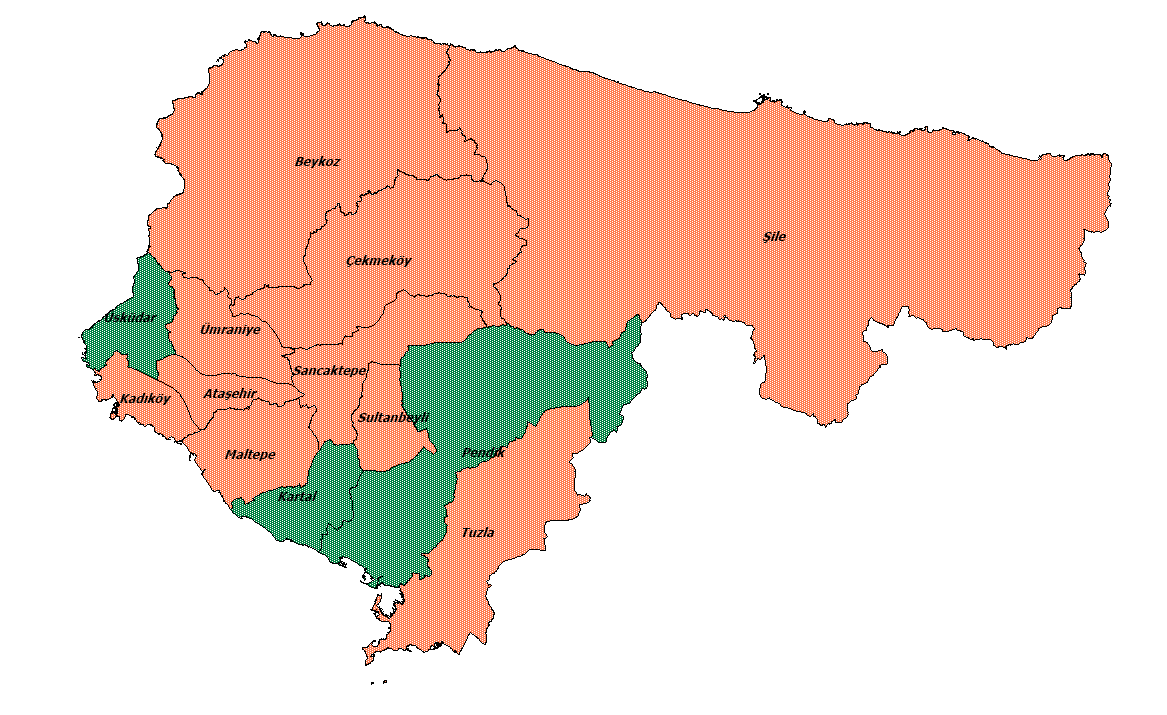

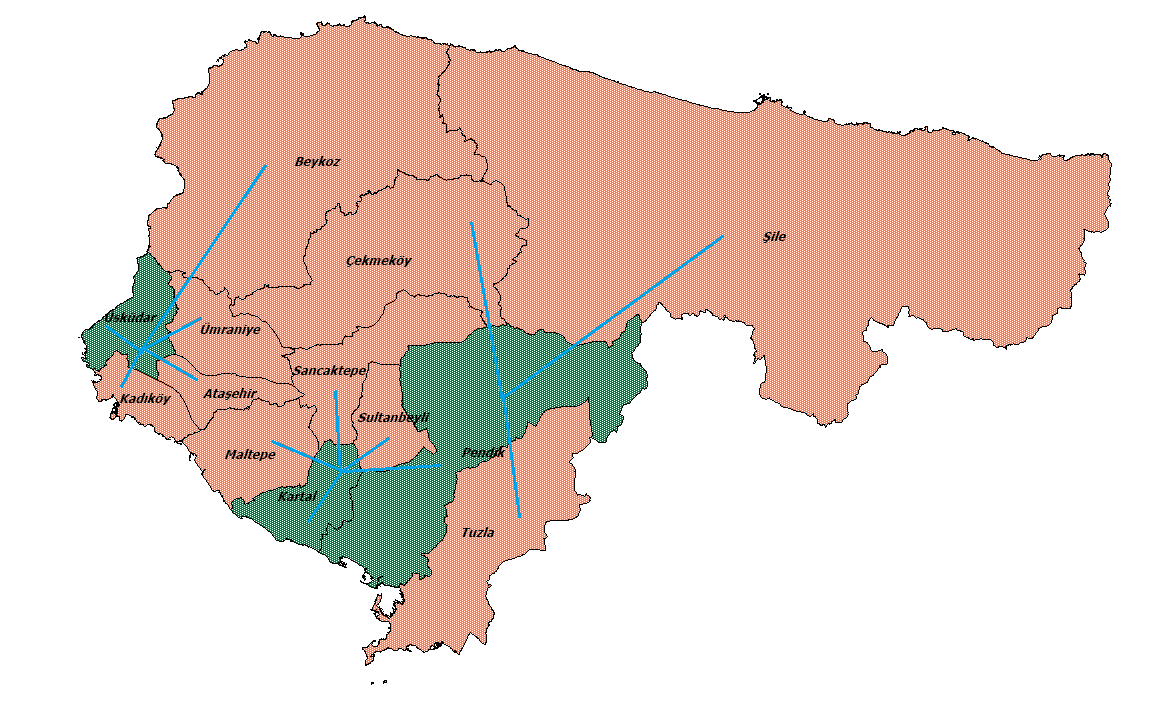

In the study, green colors are the locations where warehouses will be opened. Accordingly, large size warehouses should be opened in Üsküdar and Kartal, and small size warehouses should be opened in Pendik. A cost of 110 000 dollars was incurred for these 3 warehouses.